# 라이브러리 불러오기 및 한글 폰트 설치

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.


# 데이터 불러오기 및 전처리, 시각화

In [23]:
df = pd.read_csv('/content/drive/MyDrive/DSL/EDA프로젝트/population_market_df.csv', index_col = 0)
df1 = df[df['기준_년_코드'] == 2022] # 2022년 데이터만 고려
df1['비율'] = df1['총_직장인구_수']/df1['총_상주인구_수'] # 직장인구/상주인구 비율 column 추가
df2 = df1.iloc[:,[2,8,10]] # 필요없는 column drop
df2.reset_index(inplace = True)
df2.drop(['index'], axis = 1, inplace = True)

<ipython-input-23-95fafc202bce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['비율'] = df1['총_직장인구_수']/df1['총_상주인구_수'] # 직장인구/상주인구 비율 column 추가
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
df2

,상권_코드_명,서비스_업종_코드_명,비율
0,강남 마이스 관광특구,전자상거래업,548.413793
1,강남 마이스 관광특구,인테리어,548.413793
2,강남 마이스 관광특구,가전제품,548.413793
3,강남 마이스 관광특구,가구,548.413793
4,강남 마이스 관광특구,화초,548.413793
...,...,...,...
208396,이북5도청사,한식음식점,0.911111
208397,이북5도청사,운동/경기용품,0.911111
208398,이북5도청사,일반교습학원,0.911111
208399,이북5도청사,분식전문점,0.911111


In [25]:
# 업종별 one-hot encoding

for i in range(0,208401):
  now_market = df2.iloc[i,1]
  if now_market in df2.columns:
    df2.loc[i, now_market] += 1
  else:
    df2[now_market] = [0]*208401
    df2.loc[i, now_market] += 1

<ipython-input-25-c44cc7e5a733>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[now_market] = [0]*208401
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [26]:
df3 = df2.groupby(['상권_코드_명', '비율']).sum().reset_index().sort_values(by = '비율', ascending = False) # 상권별로 업종 합산
df3.loc[1557] = df3.sum(axis = 0) # 전체 상권 합산 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


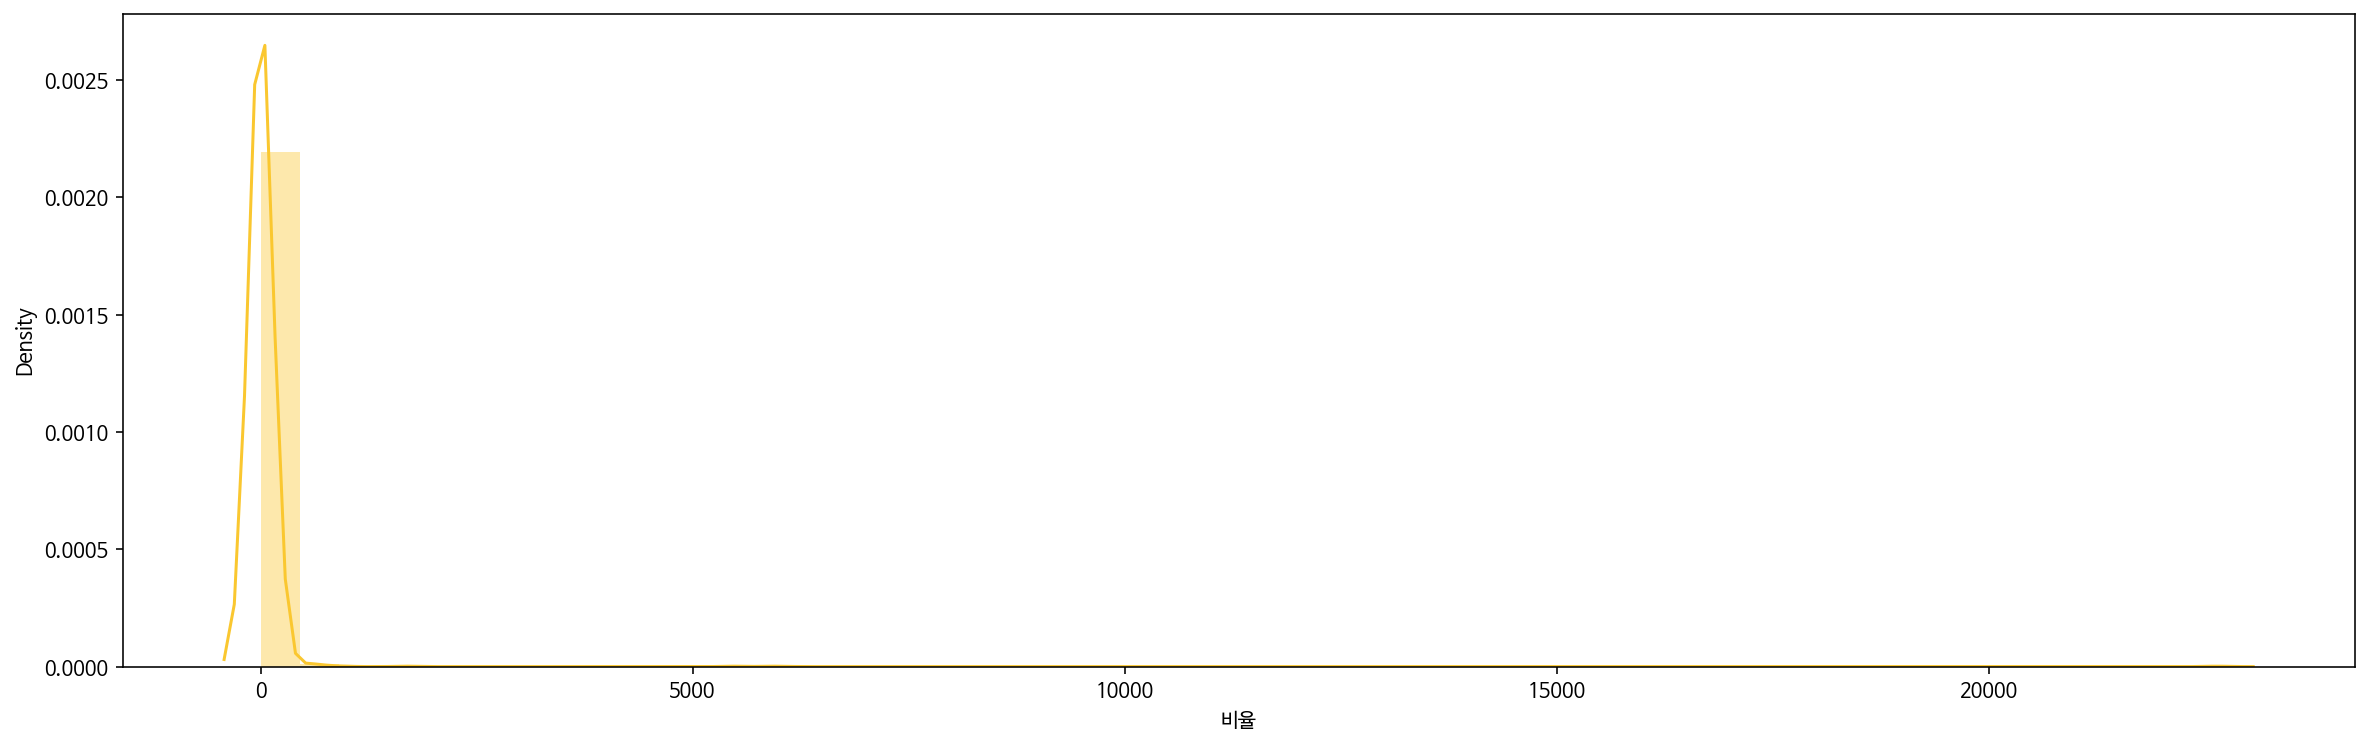

In [27]:
# 전체 비율 plot

plt.figure(figsize = (20,6))
sns.distplot(df3.iloc[:-1,1], color = '#FAC730')
plt.show()

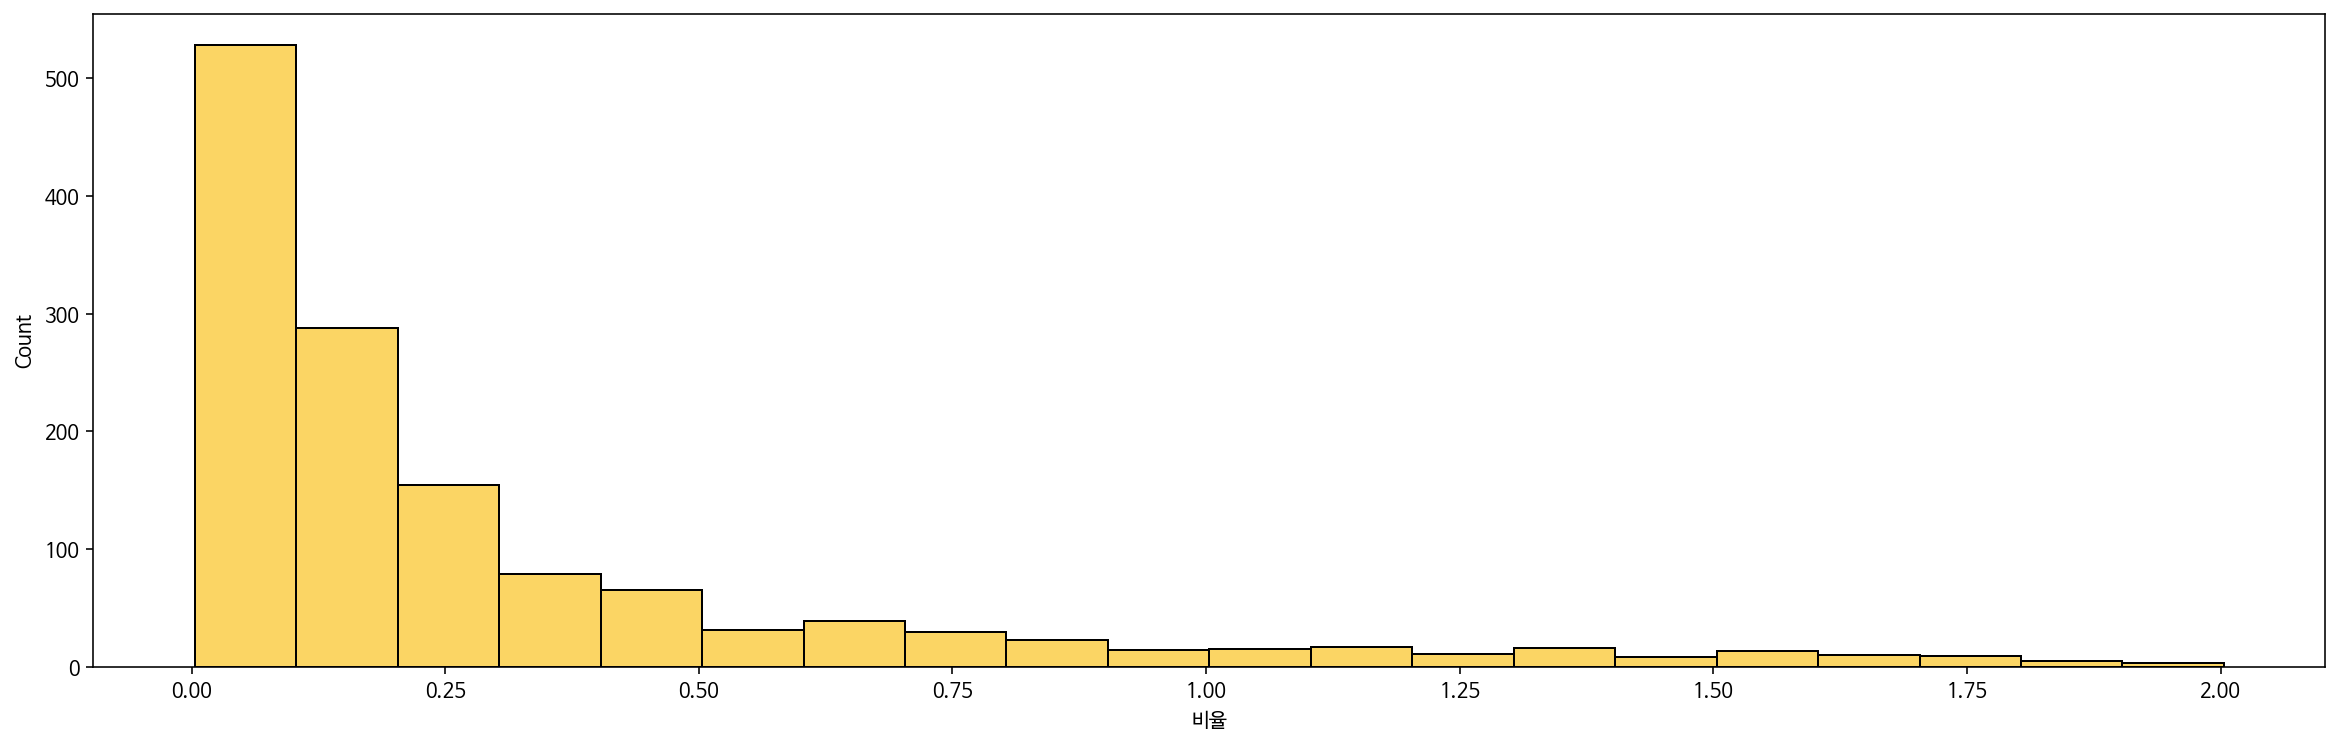

In [28]:
# 이상치 제거 후 plot

plt.figure(figsize = (20,6))
sns.histplot(df3[df3['비율'] < 2].iloc[:-1,1], binwidth = 0.1, color = '#FAC730')
plt.show()

In [32]:
df3.reset_index(inplace = True)
df3.drop('index', axis = 1, inplace = True)
df3

,상권_코드_명,비율,전자상거래업,인테리어,가전제품,가구,화초,완구,운동/경기용품,화장품,...,미곡판매,가전제품수리,PC방,예술학원,외국어학원,일반교습학원,부동산중개업,자동차미용,자전거 및 기타운송장비,label2
0,롯데백화점(시청광장 지하쇼핑센터),22641.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,나머지
1,구로디지털단지,5968.750000,9,3,9,0,9,0,6,9,...,0,0,0,0,9,9,0,0,0,나머지
2,삼익패션타운(남대문시장),5494.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,성북구 삼선동
3,고속터미널(고속터미널역),1692.666667,0,0,0,0,9,0,0,9,...,0,6,0,9,9,9,0,0,0,나머지
4,엔터식스 강남점,925.000000,0,9,0,0,9,0,0,9,...,0,0,0,0,0,0,0,0,0,상주인구 우세 상권
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,홍제역 3번,0.005590,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,상주인구 우세 상권
1554,보라매동주민센터(당곡고등학교),0.004148,0,0,0,0,0,0,0,9,...,0,0,0,0,0,0,0,0,0,성북구 삼선동
1555,양천향교역 7번,0.003257,0,0,0,0,9,0,3,9,...,0,0,0,0,0,0,0,0,0,상주인구 우세 상권
1556,구파발역,0.000634,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,나머지


In [33]:
# 성수1가1동 삼선동 구간 label

df3['label2'] = np.NaN

for i in range(0, 1558):
  if df3.iloc[i, 1] < 0.1:
    df3.loc[i, 'label2'] = '상주인구 우세 상권'
  elif 0.1 < df3.iloc[i, 1] < 0.2:
    df3.loc[i, 'label2'] = '성동구 성수 1가 1동'
  elif 0.2 < df3.iloc[i, 1] < 0.3 :
    df3.loc[i, 'label2'] = '성북구 삼선동'
  else:
    df3.loc[i, 'label2'] = '나머지'

In [35]:
#전체 데이터 및 성수1가1동 삼선동 구간 데이터 형성

final1_df = df3.groupby('label2').sum().reset_index().iloc[2:, :]
df4 = pd.concat([df3, final1_df])
final_df3 = df4.reset_index().iloc[-3:,:]
final_df3.drop(['index', '상권_코드_명', '비율'], axis = 1, inplace = True)
final_df4 = final_df3.iloc[:,:-1].sort_values(by = 1557, axis = 1, ascending = False)

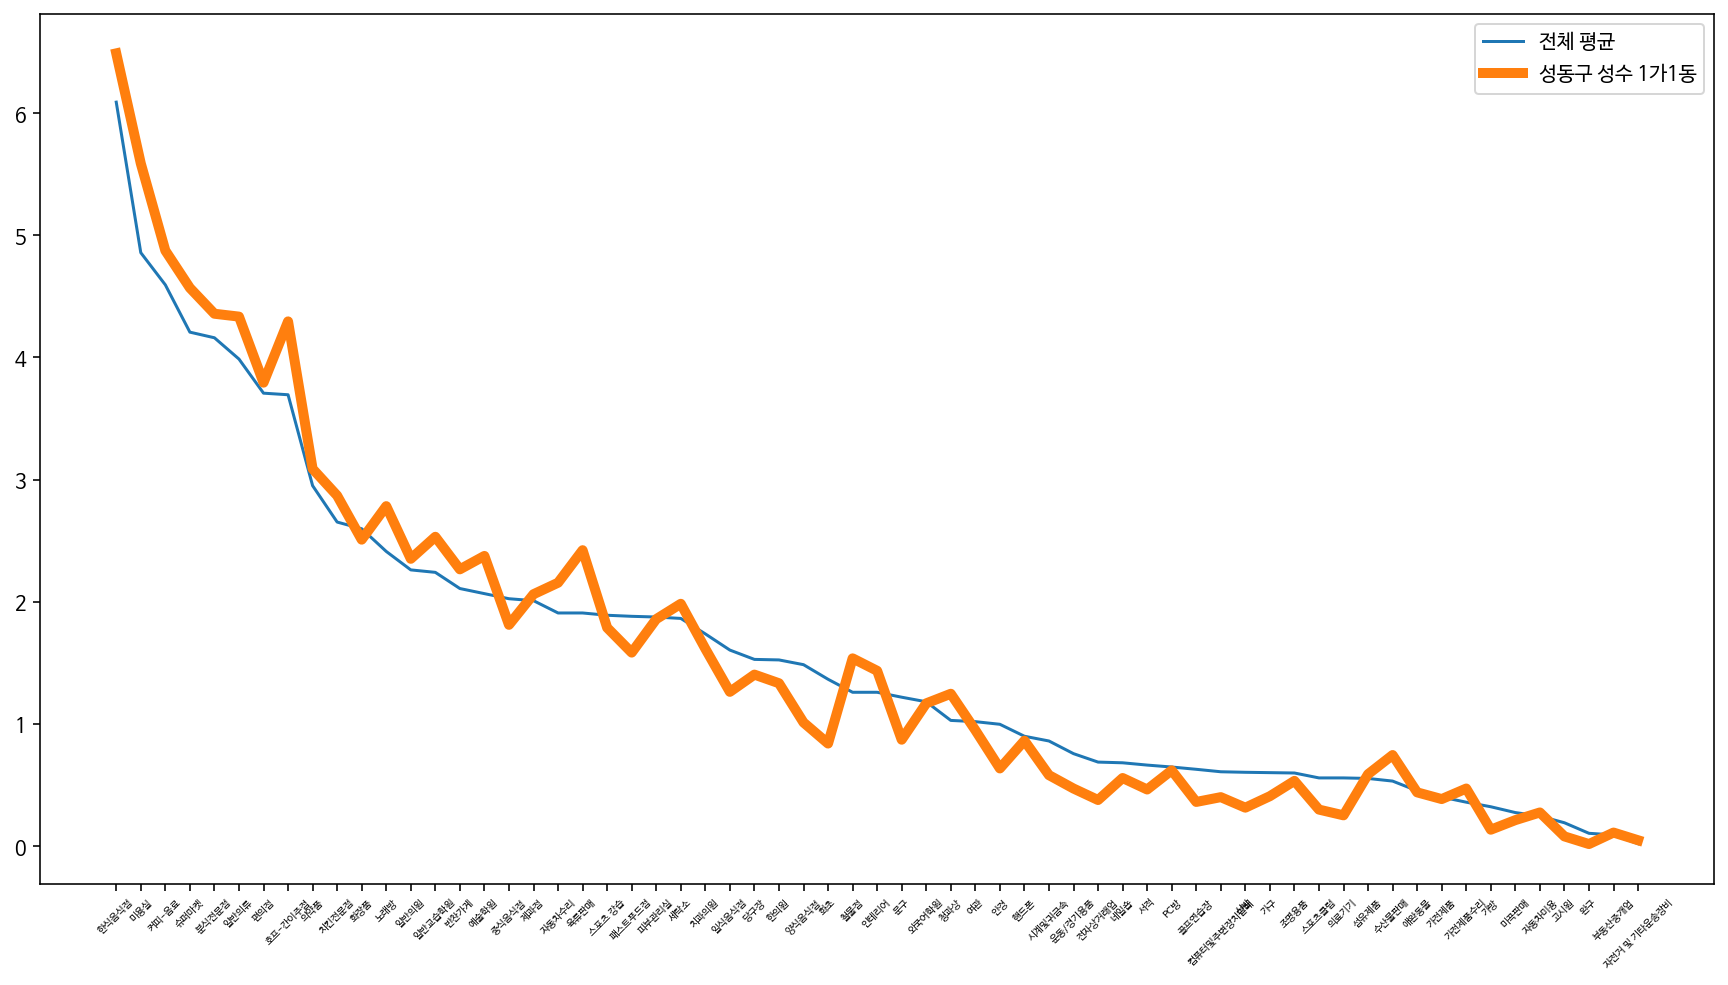

In [38]:
# 전체 데이터, 성수1가1동 plot

plt.figure(figsize = (15, 8))
plt.plot(final_df4.columns, final_df4.iloc[0,:] / sum(final_df4.iloc[0,:]) *100 ,label = '전체 평균')
plt.plot(final_df4.columns, final_df4.iloc[1,:] / sum(final_df4.iloc[1,:]) *100 ,label = '성동구 성수 1가1동', linewidth = 5)
plt.legend()
plt.xticks(final_df4.columns, rotation = 45, fontsize = 5)
plt.show()

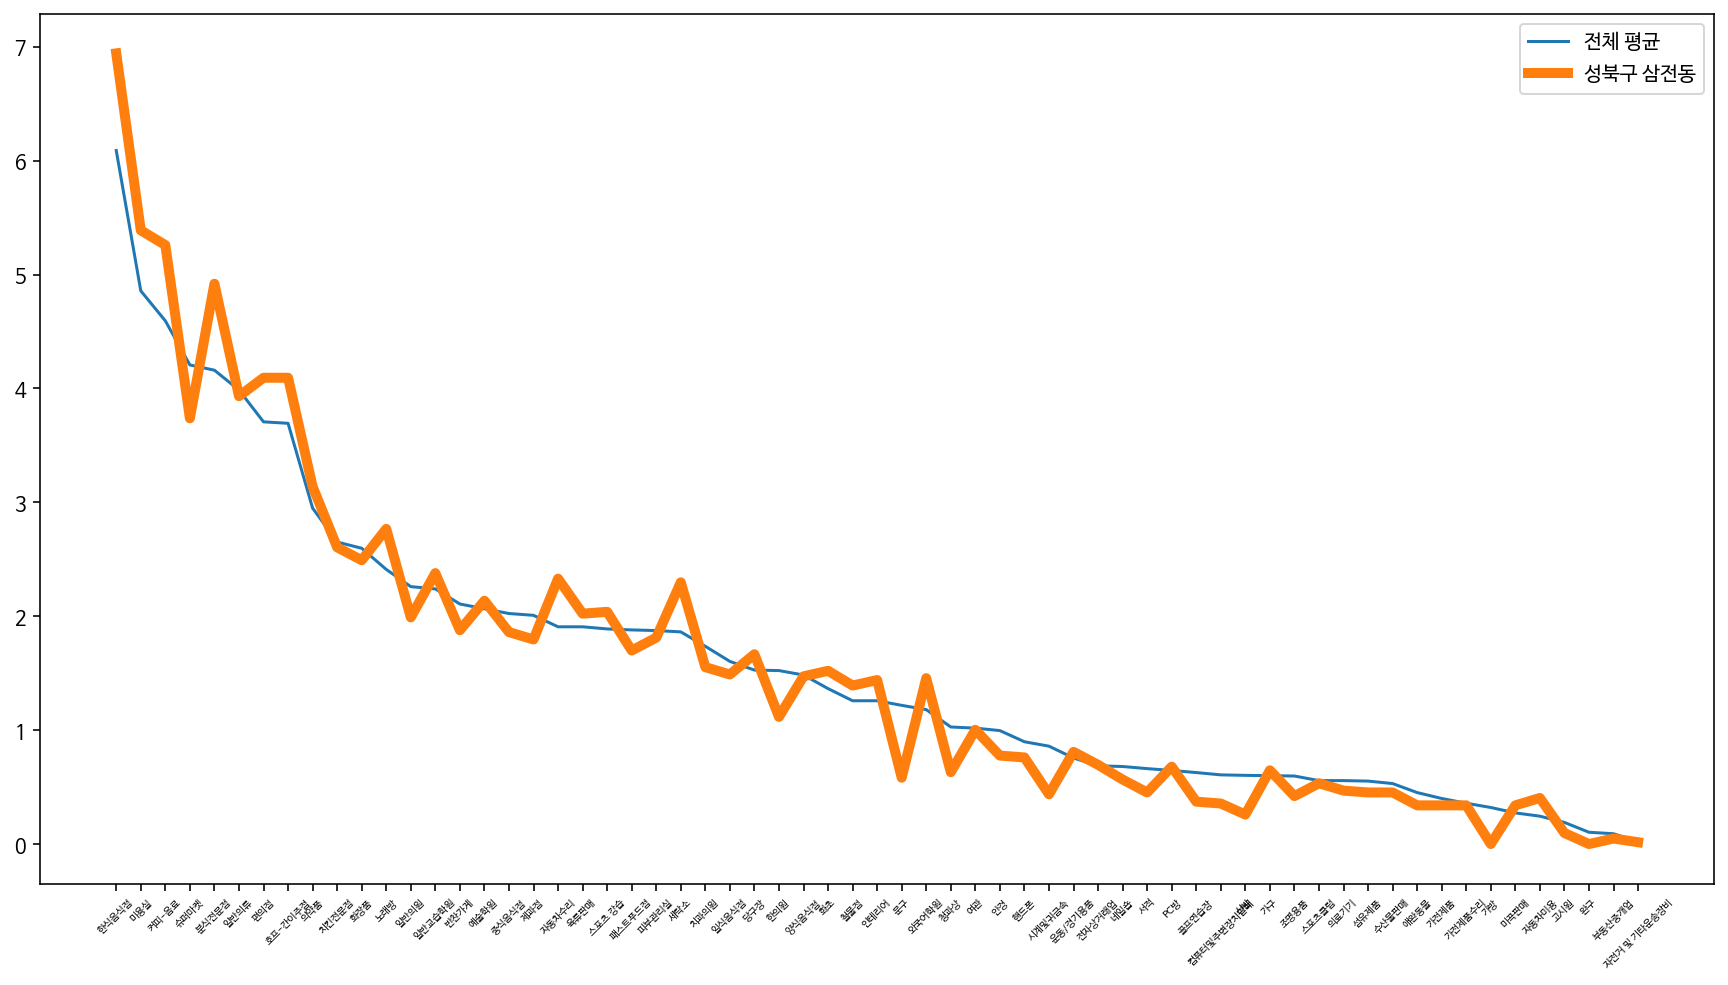

In [39]:
# 전체 데이터, 삼선동 plot

plt.figure(figsize = (15, 8))
plt.plot(final_df4.columns, final_df4.iloc[0,:] / sum(final_df4.iloc[0,:]) *100 ,label = '전체 평균')
plt.plot(final_df4.columns, final_df4.iloc[2,:] / sum(final_df4.iloc[2,:]) *100 ,label = '성북구 삼전동', linewidth = 5)
plt.legend()
plt.xticks(final_df4.columns, rotation = 45, fontsize = 5)
plt.show()